# (2.1) Basic Terminology

## Iris Flower dataset

Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\Laptop\AppData\Local\Temp\ipykernel_35472\4135553585.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Read the Dataset


In [3]:
dataset = pd.read_csv('Iris.csv')
print(dataset.head(5))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### How many data-points and features?

In [4]:
print(dataset.info())
print("Features:", len(dataset.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Features: 5


### What are the column names in the dataset?

In [6]:
print(dataset.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


### How many data points for each class are present?
### How many flowers for each species are present?

###Note: balanced-dataset vs imbalanced datasets
###Iris is a balanced dataset as the number of data points for every class is 50.

In [7]:
print(dataset[['species']].value_counts())

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# (2.2) 2-D Scatter Plot

###2-D scatter plot:
###ALWAYS understand the axis: labels and scale.



###cannot make much sense out it.
###What if we color the points by thier class-label/flower-type.

<Axes: xlabel='petal_length', ylabel='petal_width'>

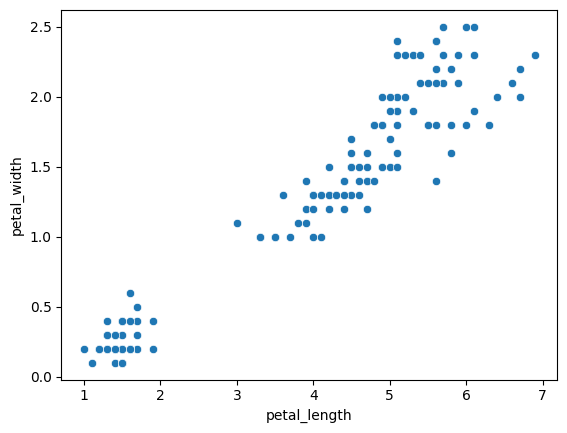

In [8]:
# sns.jointplot(data=dataset, x='petal_length', y='petal_width', hue='species')
sns.scatterplot(data=dataset, x='petal_length', y='petal_width')

### 2-D Scatter plot with color-coding for each flower type/class.
### Here 'sns' corresponds to seaborn.

### Notice that the blue points can be easily seperated
### from red and green by drawing a line.
### But red and green data points cannot be easily seperated.
### Can we draw multiple 2-D scatter plots for each combination of features?
### How many cobinations exist? 4C2 = 6.

<Axes: xlabel='petal_length', ylabel='petal_width'>

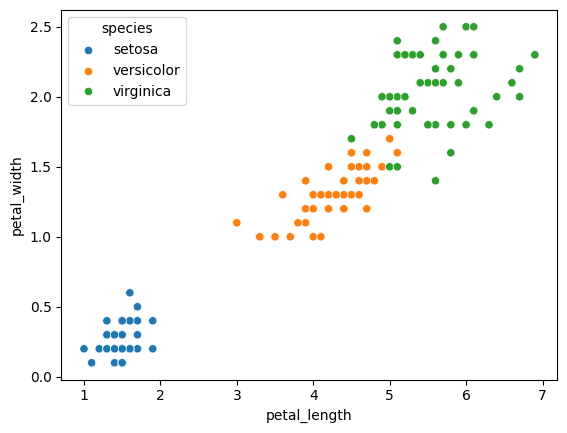

In [9]:
sns.scatterplot(data=dataset, x='petal_length', y='petal_width', hue='species')

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

In [10]:
import plotly.express as px

fig3d = px.scatter_3d(dataset, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig3d.show()

#  (2.3) Pair-plot

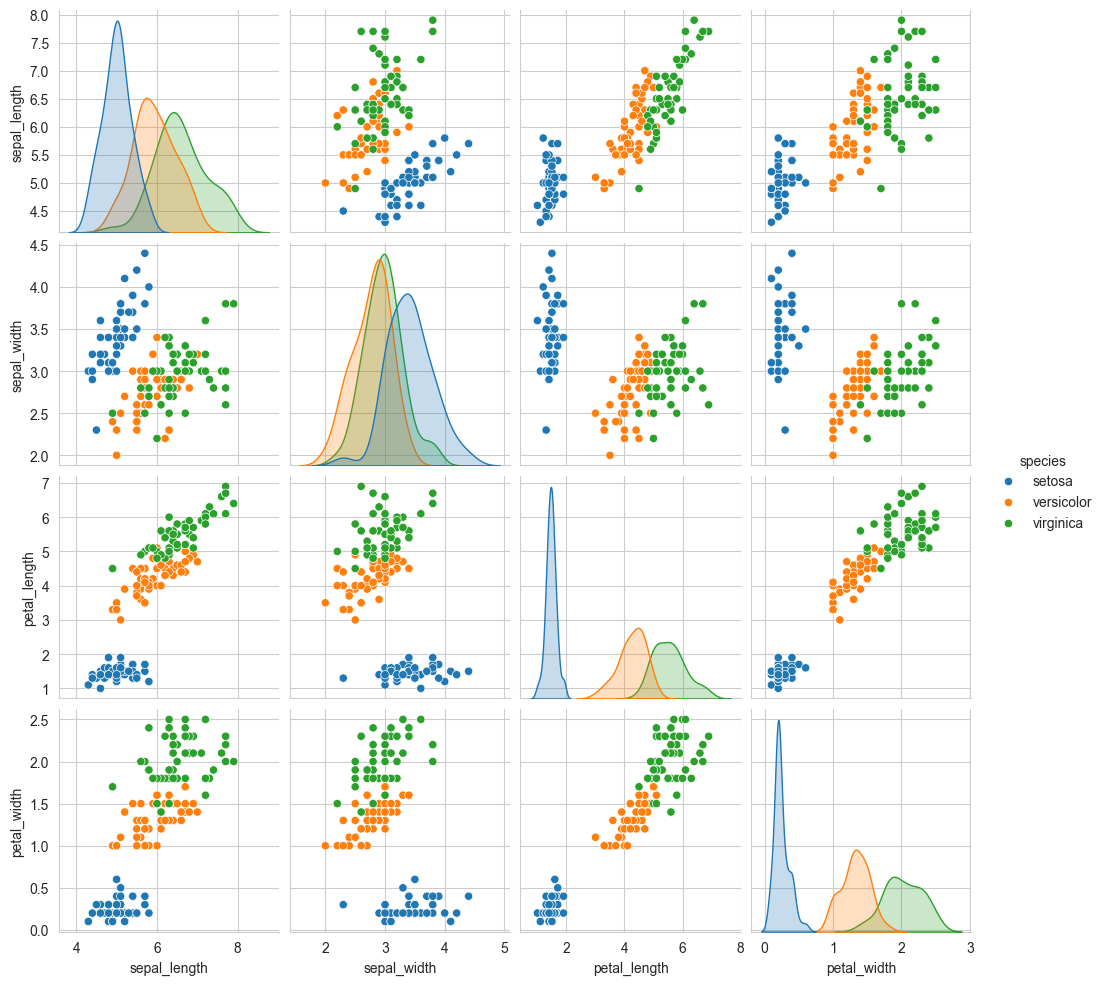

In [11]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue='species')
plt.show()

### pairwise scatter plot: Pair-Plot
### Dis-advantages:
###Can be used when number of features are high.
###Cannot visualize higher dimensional patterns in 3-D and 4-D.
###Only possible to view 2D patterns.

### NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

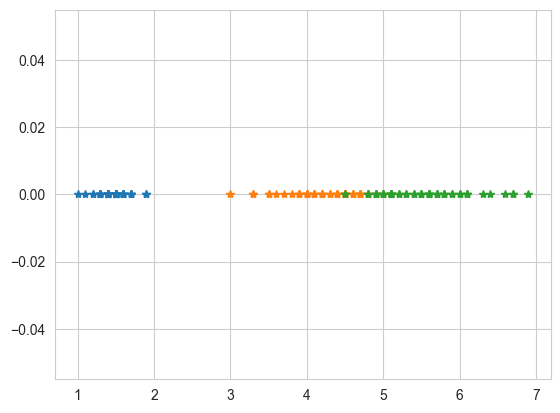

In [26]:
import numpy as np

for i in dataset['species'].unique():
    iris_species = dataset[dataset['species'] == i]
    plt.plot(iris_species['petal_length'], np.zeros_like(iris_species['petal_length']), '*')

plt.show()

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (2.4) Histogram, Probability Density Function (PDF), Cumulative Density Function (CDF)

### What about 1-D scatter plot using just one feature?
###1-D scatter plot of petal-length

###Disadvantages of 1-D scatter plot: Very hard to make sense as points
###are overlapping a lot.
###Are there better ways of visualizing 1-D scatter plots? Solution: Histograms and Distribution Plot

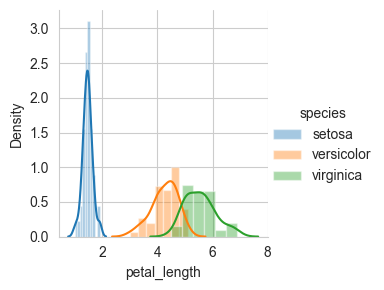

In [15]:
sns.FacetGrid(dataset, hue='species').map(sns.distplot, 'petal_length').add_legend()
plt.show()

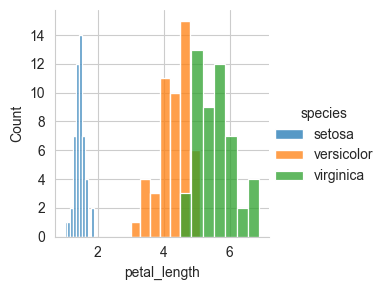

In [16]:
sns.FacetGrid(dataset, hue='species').map(sns.histplot, 'petal_length').add_legend()
plt.show()

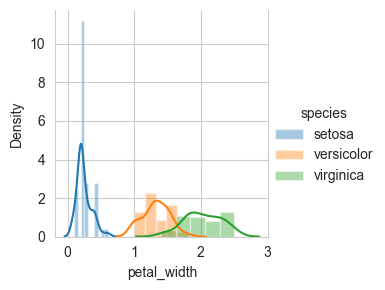

In [18]:
sns.FacetGrid(dataset, hue='species').map(sns.distplot, 'petal_width').add_legend()
plt.show()

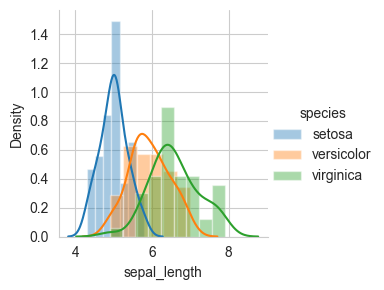

In [19]:
sns.FacetGrid(dataset, hue='species').map(sns.distplot, 'sepal_length').add_legend()
plt.show()

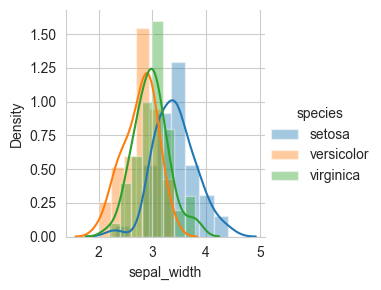

In [20]:
sns.FacetGrid(dataset, hue='species').map(sns.distplot, 'sepal_width').add_legend()
plt.show()

#### Note: The more the Farther the distributions for a feature, the better the feature is> Petal length and petal width are better features. Pteal length is better than petal width because of shorter tail
### Histograms and Probability Density Functions (PDF) using KDE

### Interpreting a PDF:
### Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
### Using just one feature, we can build a simple "model" suing if..else... statements.

### Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?


### Need for Cumulative Distribution Function (CDF)- Blue line-PDF and Orange line-CDF
### CDF always lies between 0-1
### You can build a PDF by drawing a Histogram and then smoothing it
### The cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x
### CDF at a particular point is the Area under the curve of PDF until that point. Hence if you differentiate your CDF you will get ur PDF. If you do integration on your PDF you will get CDF
### We can visually see what percentage of versicolor flowers have a
### petal_length of less than 5?

###lot CDF of petal_length




For Species: setosa
[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


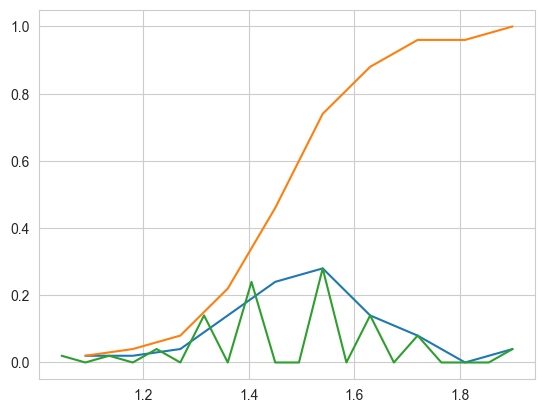

For Species: versicolor
[0.0952381  0.19047619 0.28571429 0.19047619 0.76190476 0.66666667
 0.57142857 0.95238095 0.66666667 0.38095238]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]


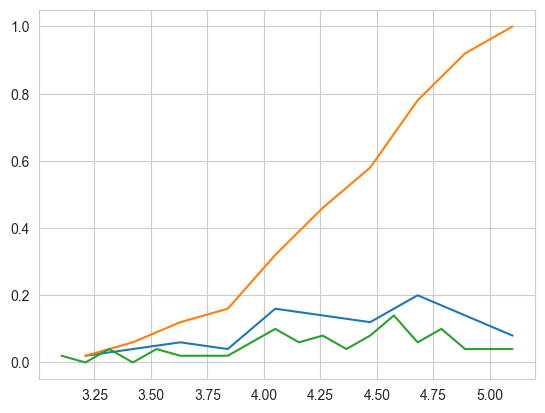

For Species: virginica
[0.08333333 0.41666667 1.         0.33333333 0.75       0.66666667
 0.41666667 0.16666667 0.08333333 0.25      ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]


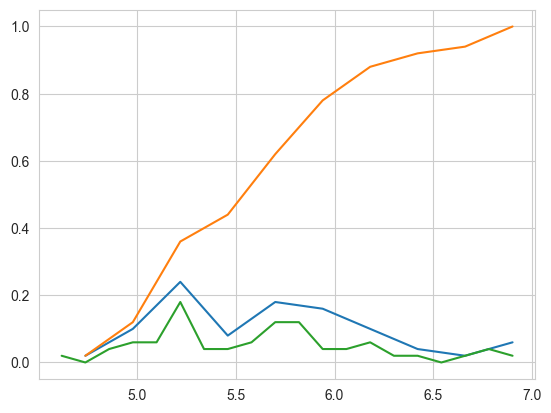

In [29]:

for species in dataset['species'].unique():
    print("For Species:", species)
    iris_species = dataset[dataset['species'] == species]
    counts, bin_edges = np.histogram(iris_species['petal_length'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)


    counts, bin_edges = np.histogram(iris_species['petal_length'], bins=20, 
                                    density = True)
    pdf = counts/(sum(counts))
    plt.plot(bin_edges[1:],pdf)
    plt.show()



### Need for Cumulative Distribution Function (CDF)
### We can visually see what percentage of versicolor flowers have a
### petal_length of less than 1.6?
### How to construct a CDF?
### How to read a CDF?

###Plot CDF of petal_length



For Species: setosa
[ 2.4  0.  11.2  2.8  0.   0.   2.8  0.   0.4  0.4]
[0.12 0.   0.56 0.14 0.   0.   0.14 0.   0.02 0.02]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
[0.12 0.12 0.68 0.82 0.82 0.82 0.96 0.96 0.98 1.  ]


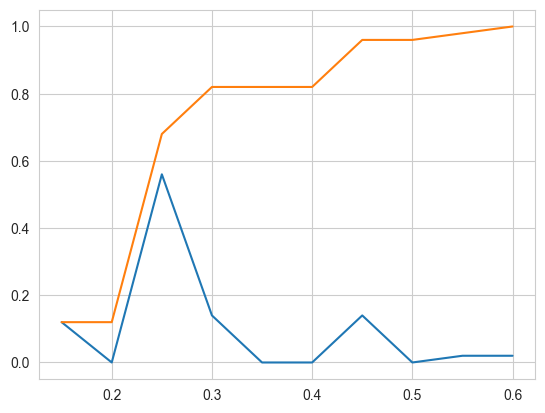

For Species: versicolor
[1.75 0.75 1.25 3.25 0.   1.75 2.5  0.75 0.25 0.25]
[0.14 0.06 0.1  0.26 0.   0.14 0.2  0.06 0.02 0.02]
[1.   1.08 1.16 1.24 1.32 1.4  1.48 1.56 1.64 1.72 1.8 ]
[0.14 0.2  0.3  0.56 0.56 0.7  0.9  0.96 0.98 1.  ]


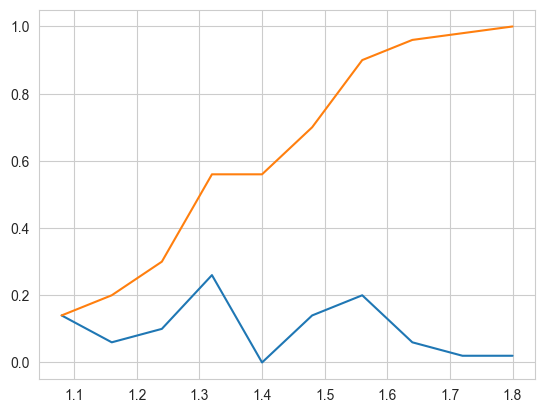

For Species: virginica
[0.54545455 0.18181818 0.18181818 2.         0.90909091 1.09090909
 1.09090909 0.54545455 1.45454545 1.09090909]
[0.06 0.02 0.02 0.22 0.1  0.12 0.12 0.06 0.16 0.12]
[1.4  1.51 1.62 1.73 1.84 1.95 2.06 2.17 2.28 2.39 2.5 ]
[0.06 0.08 0.1  0.32 0.42 0.54 0.66 0.72 0.88 1.  ]


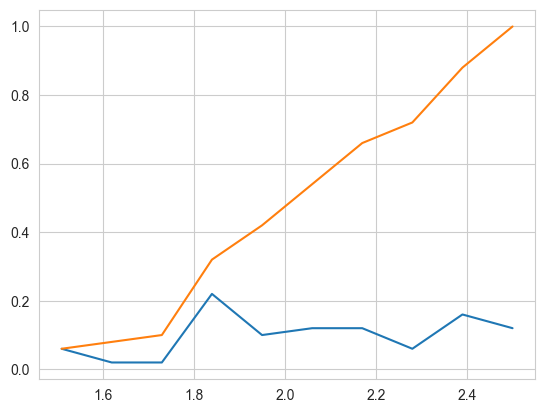

In [31]:

for species in dataset['species'].unique():
    print("For Species:", species)
    iris_species = dataset[dataset['species'] == species]
    counts, bin_edges = np.histogram(iris_species['petal_width'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.show()



### Plots of CDF of petal_length for various types of flowers.

### Misclassification error if you use petal_length only.



For Species: setosa
[0.53333333 0.13333333 0.8        0.66666667 1.6        1.06666667
 0.53333333 0.66666667 0.26666667 0.4       ]
[0.08 0.02 0.12 0.1  0.24 0.16 0.08 0.1  0.04 0.06]
[4.3  4.45 4.6  4.75 4.9  5.05 5.2  5.35 5.5  5.65 5.8 ]
[0.08 0.1  0.22 0.32 0.56 0.72 0.8  0.9  0.94 1.  ]


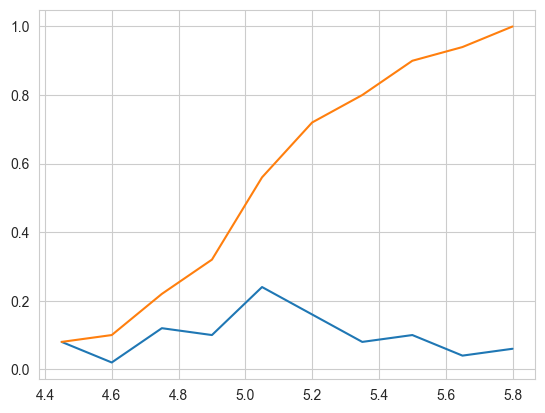

For Species: versicolor
[0.38095238 0.0952381  0.57142857 0.95238095 0.47619048 0.76190476
 0.47619048 0.28571429 0.47619048 0.28571429]
[0.08 0.02 0.12 0.2  0.1  0.16 0.1  0.06 0.1  0.06]
[4.9  5.11 5.32 5.53 5.74 5.95 6.16 6.37 6.58 6.79 7.  ]
[0.08 0.1  0.22 0.42 0.52 0.68 0.78 0.84 0.94 1.  ]


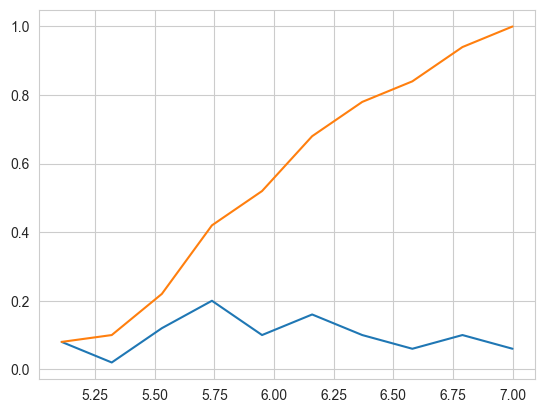

For Species: virginica
[0.06666667 0.         0.33333333 0.33333333 0.53333333 0.6
 0.66666667 0.33333333 0.06666667 0.4       ]
[0.02 0.   0.1  0.1  0.16 0.18 0.2  0.1  0.02 0.12]
[4.9 5.2 5.5 5.8 6.1 6.4 6.7 7.  7.3 7.6 7.9]
[0.02 0.02 0.12 0.22 0.38 0.56 0.76 0.86 0.88 1.  ]


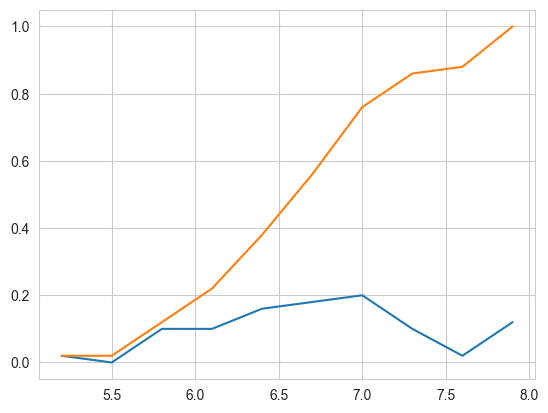

In [32]:

for species in dataset['species'].unique():
    print("For Species:", species)
    iris_species = dataset[dataset['species'] == species]
    counts, bin_edges = np.histogram(iris_species['sepal_length'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.show()



For Species: setosa
[0.53333333 0.13333333 0.8        0.66666667 1.6        1.06666667
 0.53333333 0.66666667 0.26666667 0.4       ]
[0.08 0.02 0.12 0.1  0.24 0.16 0.08 0.1  0.04 0.06]
[4.3  4.45 4.6  4.75 4.9  5.05 5.2  5.35 5.5  5.65 5.8 ]
[0.08 0.1  0.22 0.32 0.56 0.72 0.8  0.9  0.94 1.  ]


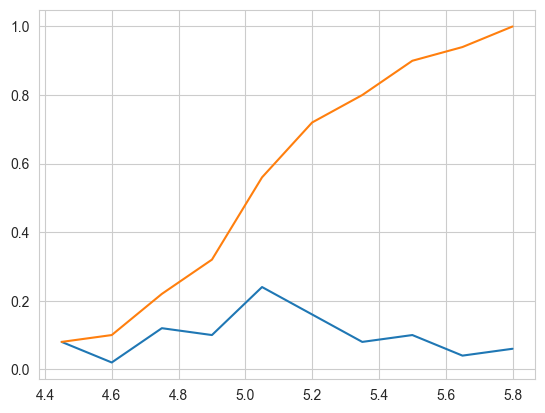

For Species: versicolor
[0.38095238 0.0952381  0.57142857 0.95238095 0.47619048 0.76190476
 0.47619048 0.28571429 0.47619048 0.28571429]
[0.08 0.02 0.12 0.2  0.1  0.16 0.1  0.06 0.1  0.06]
[4.9  5.11 5.32 5.53 5.74 5.95 6.16 6.37 6.58 6.79 7.  ]
[0.08 0.1  0.22 0.42 0.52 0.68 0.78 0.84 0.94 1.  ]


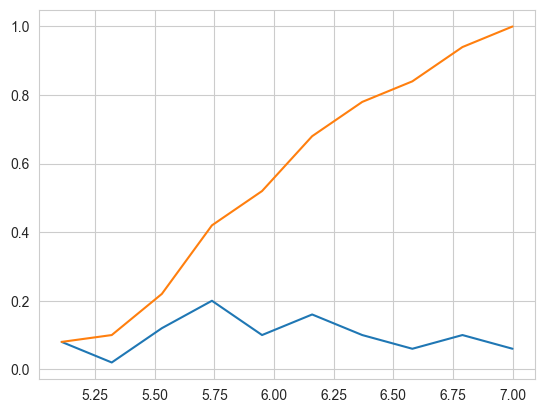

For Species: virginica
[0.06666667 0.         0.33333333 0.33333333 0.53333333 0.6
 0.66666667 0.33333333 0.06666667 0.4       ]
[0.02 0.   0.1  0.1  0.16 0.18 0.2  0.1  0.02 0.12]
[4.9 5.2 5.5 5.8 6.1 6.4 6.7 7.  7.3 7.6 7.9]
[0.02 0.02 0.12 0.22 0.38 0.56 0.76 0.86 0.88 1.  ]


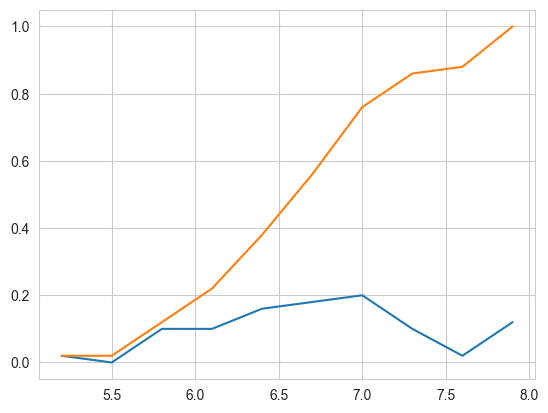

In [33]:

for species in dataset['species'].unique():
    print("For Species:", species)
    iris_species = dataset[dataset['species'] == species]
    counts, bin_edges = np.histogram(iris_species['sepal_length'], bins=10, 
                                    density = True)
    print(counts)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)
    cdf = np.cumsum(pdf)
    print(cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.show()



# (2.5) Mean, Variance and Std-dev

###Mean, Variance, Std-deviation,
###Mean with an outlier.





In [82]:
print("For petal lenght only\n")
feature = 'petal_length'
for species in dataset['species'].unique():
    print("Species:", species)
    print("Mean:", dataset[dataset['species'] == species][feature].mean())
    print("Variance", dataset[dataset['species'] == species][feature].var())
    print("Standard Deviation:", dataset[dataset['species'] == species][feature].std())
    print()


For petal lenght only

Species: setosa
Mean: 1.464
Variance 0.030106122448979592
Standard Deviation: 0.17351115943644546

Species: versicolor
Mean: 4.26
Variance 0.22081632653061228
Standard Deviation: 0.46991097723995795

Species: virginica
Mean: 5.5520000000000005
Variance 0.30458775510204084
Standard Deviation: 0.5518946956639834



### (2.6) Median, Percentile, Quantile, Interquartile Range (IQR), Median Absolute Deviation (MAD)

###Median, Quantiles, Percentiles, IQR.

###Median with an outlier



In [38]:
from statsmodels import robust

print("For petal length only\n")
feature = 'petal_length'
for species in dataset['species'].unique():
    print("Species:", species)
    print("Medians:", dataset[dataset['species'] == species][feature].median())
    print("Quantiles", np.percentile(dataset[dataset['species'] == species][feature], np.arange(0, 100, 25)))
    print("Percentiles", np.percentile(dataset[dataset['species'] == species][feature], np.arange(0, 100, 10)))
    print("Median Absolute Deviation", robust.mad(dataset[dataset['species'] == species][feature]))
    print()

For petal length only

Species: setosa
Medians: 1.5
Quantiles [1.    1.4   1.5   1.575]
Percentiles [1.  1.3 1.3 1.4 1.4 1.5 1.5 1.5 1.6 1.7]
Median Absolute Deviation 0.14826022185056031

Species: versicolor
Medians: 4.35
Quantiles [3.   4.   4.35 4.6 ]
Percentiles [3.   3.59 3.9  4.   4.2  4.35 4.5  4.5  4.7  4.8 ]
Median Absolute Deviation 0.5189107764769602

Species: virginica
Medians: 5.55
Quantiles [4.5   5.1   5.55  5.875]
Percentiles [4.5  4.9  5.1  5.1  5.36 5.55 5.6  5.8  6.   6.31]
Median Absolute Deviation 0.6671709983275211



# (2.7) Box plot and Whiskers


###Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
### The Concept of median, percentile, quantile.
### How to draw the box in the box-plot?
### How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
### IQR like idea.

###NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers.
###Whiskers in the plot below donot correposnd to the min and max values.

###Box-plot can be visualized as a PDF on the side-ways.




<Axes: xlabel='species', ylabel='petal_length'>

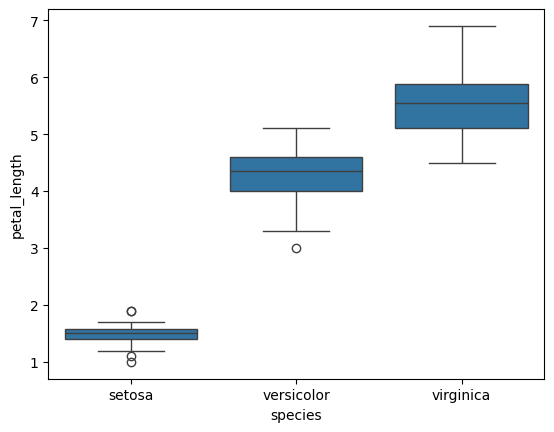

In [23]:
sns.boxplot(data=dataset, x='species', y='petal_length')

# (2.8) Violin plots

### A violin plot combines the benefits of the previous two plots and simplifies them

### Denser regions of the data are fatter, and sparser ones thinner in a violin plot


<Axes: xlabel='species', ylabel='petal_length'>

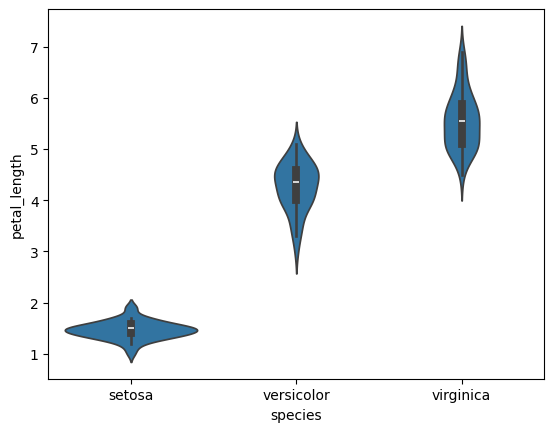

In [21]:
sns.violinplot(x='species', y='petal_length', data=dataset)

# (2.9) Exercise:
1. Use the Haberman Cancer Survival dataset given in the current directory
2. Perform a similar anaysis as above on this dataset with the following sections:
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful for classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.